In [1]:
import pandas as pd

In [2]:
seed=1234

In [3]:
#Abro el archivo con la informacion
#Abro el archivo con la informacion

#Normalizada
#data = pd.read_csv('attritionDataWithDummyVarsAndNorm.csv')

#Sin normalizar
data = pd.read_csv('attritionDataWithDummyVars.csv')


#Ensamble
#data = pd.read_csv('ensamble.csv')

### Data split

In [4]:
y=data['Dummy_Attrition_Yes']
x=data.drop(['Dummy_Attrition_Yes'], axis=1)

In [5]:
x.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,Dummy_JobRole_Research Director,Dummy_JobRole_Research Scientist,Dummy_JobRole_Sales Executive,Dummy_JobRole_Sales Representative,Dummy_MaritalStatus_Divorced,Dummy_MaritalStatus_Married,Dummy_MaritalStatus_Single,Dummy_Over18_Y,Dummy_OverTime_No,Dummy_OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,1,2,3,61,2,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,1,0,0,0,1,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,0,0,0,0,0,1,0,1,1,0


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=seed )

In [7]:
pd.DataFrame(y_train).Dummy_Attrition_Yes.value_counts()

0    863
1    166
Name: Dummy_Attrition_Yes, dtype: int64

In [8]:
pd.DataFrame(y_test).Dummy_Attrition_Yes.value_counts()

0    370
1     71
Name: Dummy_Attrition_Yes, dtype: int64

### Oversampling with SMOTE

In [9]:
#%pip install imblearn
from imblearn.over_sampling import SMOTE

In [10]:
sm = SMOTE(random_state=seed,sampling_strategy=0.3)

In [11]:
sm_x,sm_y=sm.fit_resample(x_train, y_train)

In [12]:
columns=x_train.columns

In [13]:
sm_x_df = pd.DataFrame(data=sm_x,columns=columns )
sm_y_df= pd.DataFrame(data=sm_y,columns=['Dummy_Attrition_Yes'])

In [14]:
# we can Check the numbers of our data
print("\033[1m Length of oversampled data is:",len(sm_x_df))
print("\033[1m Number of default in oversampled data is:",len(sm_y_df[sm_y_df['Dummy_Attrition_Yes']==1]))
print("\033[1m Number of no-default in oversampled data is:",len(sm_y_df[sm_y_df['Dummy_Attrition_Yes']==0]))
print("\033[1m Proportion of default data in oversampled data is:",len(sm_y_df[sm_y_df['Dummy_Attrition_Yes']==1])/len(sm_x_df))
print("\033[1m Proportion of no-default data in oversampled data is:",len(sm_y_df[sm_y_df['Dummy_Attrition_Yes']==0])/len(sm_x_df))

 Length of oversampled data is: 1121
 Number of default in oversampled data is: 258
 Number of no-default in oversampled data is: 863
 Proportion of default data in oversampled data is: 0.23015165031222123
 Proportion of no-default data in oversampled data is: 0.7698483496877788


In [15]:
pd.DataFrame(sm_y_df).Dummy_Attrition_Yes.value_counts()

0    863
1    258
Name: Dummy_Attrition_Yes, dtype: int64

In [16]:
#Comment this 2 lines if you dont want oversampling
#x_train=sm_x_df
#y_train=sm_y_df

### Oversampling with ADASYN

In [17]:
from imblearn.over_sampling import ADASYN

In [18]:
adasyn = ADASYN(sampling_strategy='auto', n_neighbors=5, random_state=seed)

#sampling_percentage = 0.3
#adasyn = ADASYN(sampling_strategy=sampling_percentage, n_neighbors=5, random_state=seed)

In [19]:
x_resampled, y_resampled = adasyn.fit_resample(x_train, y_train)

In [20]:
pd.DataFrame(y_resampled).Dummy_Attrition_Yes.value_counts()

0    863
1    854
Name: Dummy_Attrition_Yes, dtype: int64

In [21]:
#Comment this 2 lines if you dont want oversampling
#x_train=x_resampled
#y_train=y_resampled

### Simple tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=seed)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1234)

In [23]:
from sklearn.metrics import accuracy_score

y_aux = model.predict(x_train)
accuracy_score(y_train, y_aux) #evaluo cuan bien predice el training set para ver comparar con el test y ver si overfitea o underfitea

1.0

In [24]:
y_pred = model.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7777777777777778

In [26]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, y_pred)
print(confusionMatrix)

### MATRIX IS INVERTED
## TN | FP
## FN | TP

[[315  55]
 [ 43  28]]


In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#precision is the ratio tp / (tp + fp) % of real positive over all the positives given by the algorithm
#recall is the ratio tp / (tp + fn) positive predictions over total positive
#Accuracy tp+tn/(tp+tn+fp+fn)
#Specificity= tn/tn+fp negative predictions over total positive

tn=confusionMatrix[0,0]
fp=confusionMatrix[0,1]
fn=confusionMatrix[1,0]
tp=confusionMatrix[1,1]

# Second line on output is the good one


              precision    recall  f1-score   support

           0       0.88      0.85      0.87       370
           1       0.34      0.39      0.36        71

    accuracy                           0.78       441
   macro avg       0.61      0.62      0.61       441
weighted avg       0.79      0.78      0.78       441



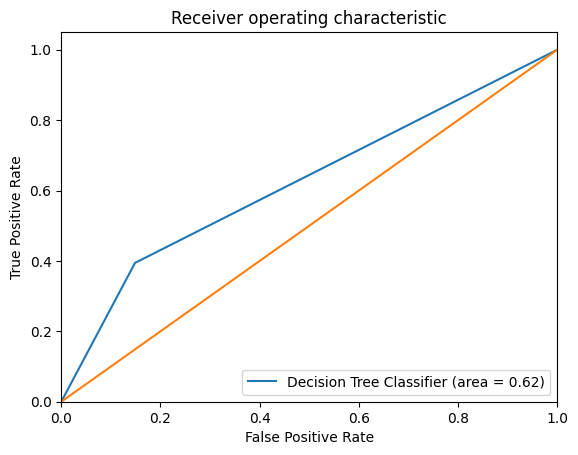

In [28]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 


model_roc_auc = roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree Classifier (area = %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.savefig('DT_ROC')
plt.show()

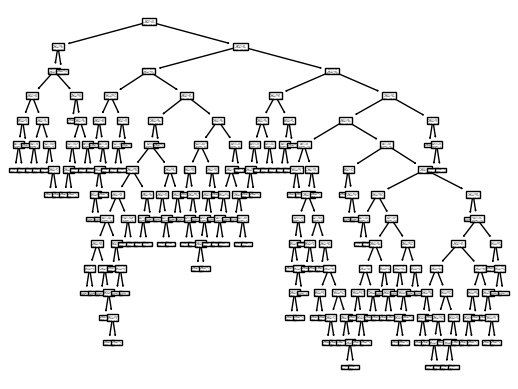

In [29]:
import sklearn.tree as tree
tree.plot_tree(model)
plt.show()

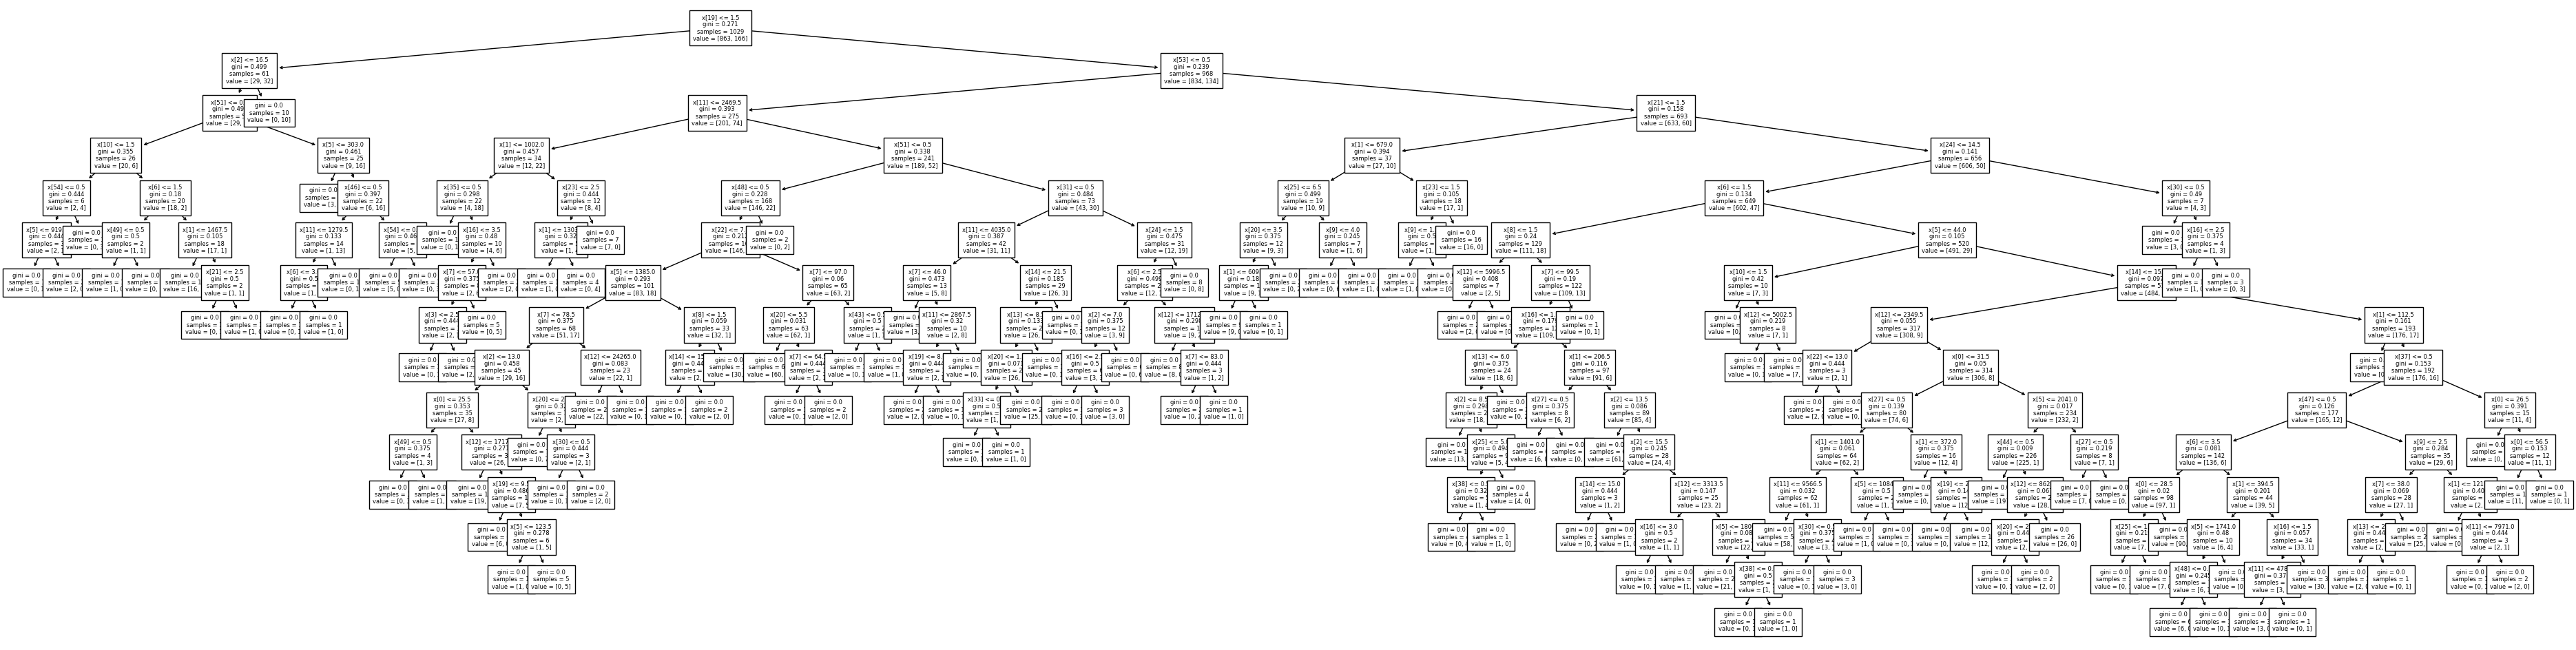

In [30]:
# save plot
plt.figure(figsize=(48,12))
tree.plot_tree(model, fontsize=6)
plt.savefig('tree_high_dpi', dpi=500)

In [31]:
#list(x_test.columns)[20]   #In case i want to see what element 20 is

<AxesSubplot: >

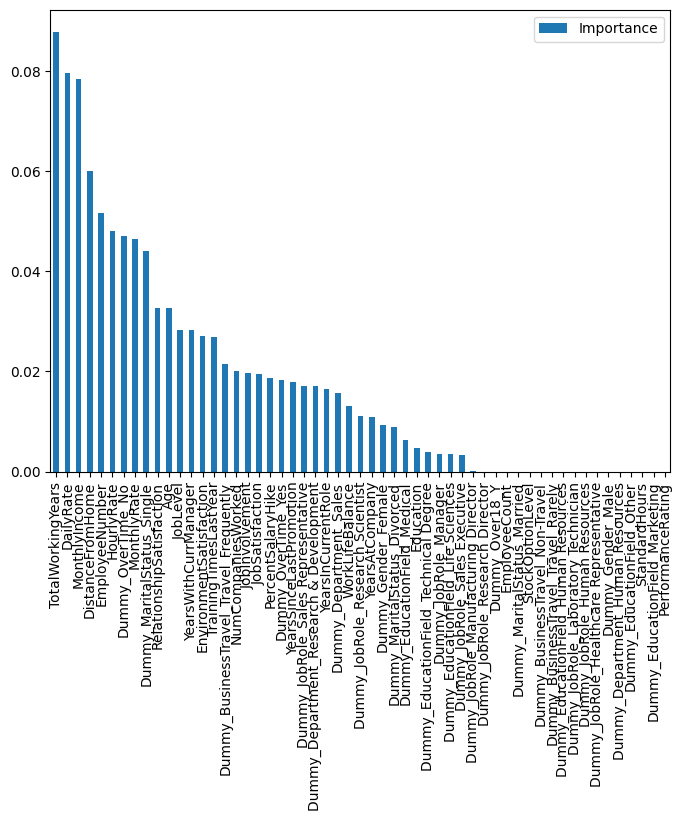

In [32]:
import matplotlib.pyplot as plt

feat_importances = pd.DataFrame(model.feature_importances_, index=x_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

## Optimizacion Bayesiana

In [33]:
#%pip uninstall scikit-learn
#%pip install scikit-learn
#%pip show scikit-learn
import warnings
warnings.filterwarnings('ignore')

In [34]:
from bayes_opt import BayesianOptimization

In [35]:
#Defines the function to maximize adding a cross validation feature to prevent overfitting 

from sklearn.model_selection import cross_val_score

def boParams(max_depth, min_samples_split,min_samples_leaf):
    
    params = {
        'max_depth': int(max_depth),
        'min_samples_split': int(min_samples_split),
        'min_samples_leaf': int(min_samples_leaf)
    }
    
    result = cross_val_score(DecisionTreeClassifier(random_state=seed, **params),
                             x_train, y_train,cv=3,scoring="f1_weighted").mean()
    
    #cv_result = xgb.cv(params, train_dmatrix, nfold=5)
    return result.mean()


#cross_val_score
#
#‘accuracy’
#‘roc_auc’
#"f1_weighted"
# f1
#https://scikit-learn.org/stable/modules/model_evaluation.html


In [36]:
# Sets the limits for the iteration of the different parameters

bo = BayesianOptimization(boParams, {'max_depth': (3, 10),
                                             'min_samples_split': (10, 400),
                                             'min_samples_leaf':(10,200)
                                             },random_state=seed)

In [37]:
results = bo.maximize(n_iter=100, init_points=16)

|   iter    |  target   | max_depth | min_sa... | min_sa... |
-------------------------------------------------------------
| 1         | 0.7651    | 4.341     | 128.2     | 180.7     |
| 2         | 0.7651    | 8.498     | 158.2     | 116.3     |
| 3         | 0.7651    | 4.935     | 162.4     | 383.7     |
| 4         | 0.7651    | 9.132     | 77.99     | 205.4     |
| 5         | 0.7651    | 7.784     | 145.4     | 154.4     |
| 6         | 0.7651    | 6.928     | 105.6     | 15.37     |
| 7         | 0.7651    | 8.41      | 177.7     | 152.3     |
| 8         | 0.8049    | 7.308     | 24.32     | 153.8     |
| 9         | 0.7651    | 9.532     | 133.8     | 164.9     |
| 10        | 0.7751    | 8.521     | 70.2      | 231.6     |
| 11        | 0.7651    | 9.084     | 92.87     | 322.8     |
| 12        | 0.7651    | 4.006     | 143.8     | 284.8     |
| 13        | 0.7651    | 4.532     | 185.7     | 182.4     |
| 14        | 0.8049    | 9.365     | 21.36     | 81.87     |
| 15    

| 80        | 0.7732    | 10.0      | 24.77     | 198.4     |
| 81        | 0.8049    | 9.397     | 31.17     | 118.4     |
| 82        | 0.7841    | 5.902     | 74.21     | 72.79     |
| 83        | 0.8029    | 9.091     | 40.17     | 57.61     |
| 84        | 0.8049    | 10.0      | 36.35     | 74.68     |
| 85        | 0.7651    | 8.356     | 154.4     | 10.1      |
| 86        | 0.7732    | 3.0       | 10.0      | 271.0     |
| 87        | 0.7651    | 10.0      | 99.07     | 266.0     |
| 88        | 0.7651    | 3.992     | 125.5     | 398.7     |
| 89        | 0.7651    | 9.876     | 123.3     | 88.81     |
| 90        | 0.7651    | 10.0      | 200.0     | 356.2     |
| 91        | 0.7651    | 3.0       | 99.16     | 361.8     |
| 92        | 0.7718    | 8.98      | 48.76     | 321.0     |
| 93        | 0.7651    | 10.0      | 168.6     | 217.1     |
| 94        | 0.7718    | 10.0      | 45.05     | 400.0     |
| 95        | 0.8049    | 9.578     | 20.64     | 126.4     |
| 96    

In [38]:
#Prints optimal parameters
params = bo.max['params']
print(params)

{'max_depth': 9.263532209158457, 'min_samples_leaf': 11.09512575924597, 'min_samples_split': 20.479495837498277}


In [39]:
#Cast the parameters to the correct format
params['max_depth']= int(params['max_depth'])
params['min_samples_split']= int(params['min_samples_split'])
params['min_samples_leaf']= int(params['min_samples_leaf'])

In [40]:
#I use the traning data to train the model and get the performance indicator. The idea is to compare with the testing
#indicators to make sure there is no overfitting 

modelTraining = DecisionTreeClassifier(**params,random_state=seed)
modelTraining.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=11, min_samples_split=20,
                       random_state=1234)

In [41]:
 predictionTraining = modelTraining.predict(x_train)

In [42]:
#Prints the report for training data
print(classification_report(y_train,predictionTraining))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       863
           1       0.74      0.44      0.55       166

    accuracy                           0.89      1029
   macro avg       0.82      0.71      0.74      1029
weighted avg       0.88      0.89      0.87      1029



In [43]:
#Now the model is trained with training and testing data but using testing data to evaluate
modelTest = DecisionTreeClassifier(**params,random_state=seed)
modelTest.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=11, min_samples_split=20,
                       random_state=1234)

In [44]:
#Predicts using testing data
predictionTest = modelTest.predict(x_test)

In [45]:
#Shows the different performance indicators for the test data
print(classification_report(y_test,predictionTest))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       370
           1       0.56      0.35      0.43        71

    accuracy                           0.85       441
   macro avg       0.72      0.65      0.67       441
weighted avg       0.83      0.85      0.84       441



In [46]:
#Prints the confusion matrix
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, predictionTest)
print(confusionMatrix)

### MATRIX IS INVERTED
## TN | FP
## FN | TP

[[350  20]
 [ 46  25]]


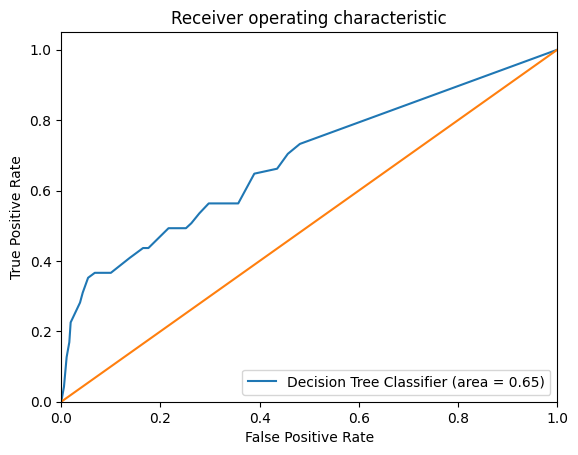

In [47]:
#Printes the area under the roc curve 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 


model_roc_auc = roc_auc_score(y_test, modelTest.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, modelTest.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree Classifier (area = %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.savefig('DT_ROC')
plt.show()

<AxesSubplot: >

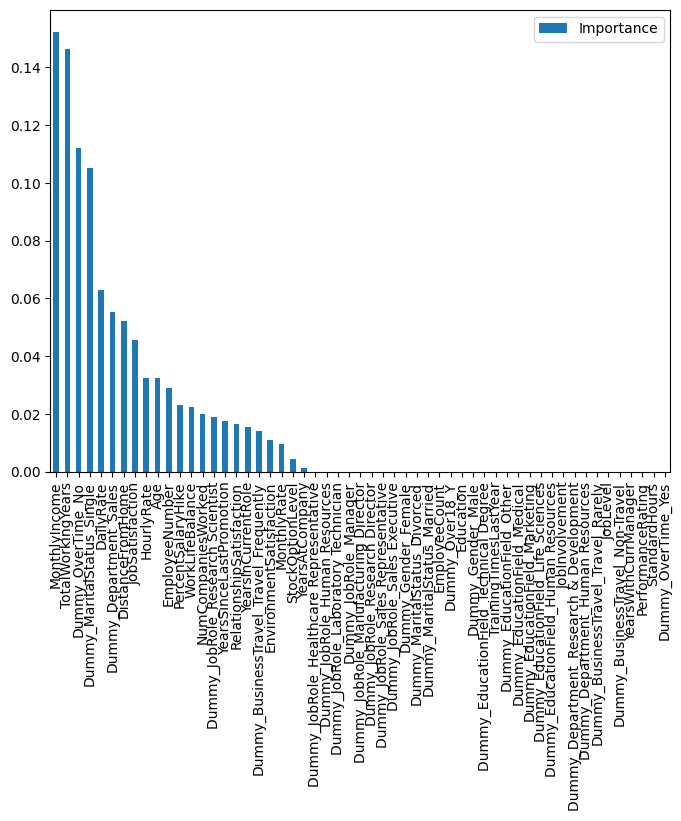

In [48]:
#Prints the feature importance
import matplotlib.pyplot as plt

feat_importances = pd.DataFrame(modelTest.feature_importances_, index=x_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

## Semillerio

In [49]:
def is_prime(num):
    if num <= 1:
        return False
    for i in range(2, int(num**0.5) + 1):
        if num % i == 0:
            return False
    return True

def generate_primes(n):
    primes = []
    num = 2 + seed
    while len(primes) < n:
        if is_prime(num):
            primes.append(num)
        num += 1
    return primes

In [50]:
n=30

In [51]:
import numpy as np
prime_list = generate_primes(n)
yPredSem=np.zeros_like(y_test)

In [52]:
for prime in prime_list:
    modelSem = DecisionTreeClassifier(**params,random_state=prime)
    modelSem.fit(x_train,y_train)
    pred = modelSem.predict(x_test)
    yPredSem=yPredSem+pred

In [53]:
yPredSem=np.round(yPredSem / n).astype(int)



In [54]:
#Shows the different performance indicators for the test data
print(classification_report(y_test,yPredSem))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       370
           1       0.56      0.35      0.43        71

    accuracy                           0.85       441
   macro avg       0.72      0.65      0.67       441
weighted avg       0.83      0.85      0.84       441



In [55]:
#Prints the confusion matrix
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, yPredSem)
print(confusionMatrix)

### MATRIX IS INVERTED
## TN | FP
## FN | TP

[[350  20]
 [ 46  25]]


In [56]:
model_roc_auc = roc_auc_score(y_test,yPredSem)
model_roc_auc

0.649029311001142

In [57]:
aux=x_test
aux['predict']=yPredSem
aux[['EmployeeNumber','predict']]

,EmployeeNumber,predict
298,407,0
625,864,0
1349,1893,0
1361,1918,0
343,463,0
...,...,...
1395,1967,0
305,419,0
1256,1760,0
553,763,1


### Export results to CSV

In [58]:
aux.to_csv('AttrttionResultsDT', index=False) 